<a href="https://colab.research.google.com/github/fienmaes/D012513A-Specialised-Bio-informatics-Machine-Learning_2/blob/main/practicum_II/Kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

import warnings;
warnings.filterwarnings('ignore');

## K-means clustering of the MNIST dataset

This project applies the k-means clustering algorithm to cluster written digits.

The [MNIST](http://yann.lecun.com/exdb/mnist/) dataset is a large database of handwritten digits. We will analyse a subset of this database with digit images reduced to 8x8 grayscaled valued pixels.  

It is a very well known dataset in the machine learing community and can be loaded directly from Scikit-learn:

In [2]:
from sklearn.datasets import load_digits

digits = load_digits()

print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In `digits`, `data` contains the pixel feature vectors and `target` contains the labels.

We assign the feature vectors to `X` and the target to `y`: 

In [3]:
X = digits.data
y = digits.target

Print the number of rows and columns in `X` and `y`:

In [4]:
#Start code here
print(X.shape)
print(y.shape)
#End code here

(1797, 64)
(1797,)


The following code shows a random datapoint:

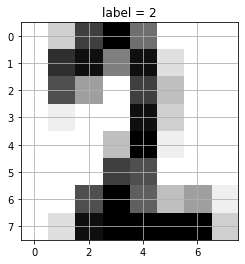

In [5]:
import random

plt.grid(b=None)
idx = random.randint(0,X.shape[0]-1)
plt.imshow(X[idx].reshape(8,8),cmap=plt.cm.gray_r)
plt.title("label = %i"%y[idx])
plt.show()

The `KMeans` function in Scikit-learn has the following parameters:

In [6]:
from sklearn.cluster import KMeans

help(KMeans)

Help on class KMeans in module sklearn.cluster._kmeans:

class KMeans(sklearn.base.TransformerMixin, sklearn.base.ClusterMixin, sklearn.base.BaseEstimator)
 |  KMeans(n_clusters=8, *, init='k-means++', n_init=10, max_iter=300, tol=0.0001, verbose=0, random_state=None, copy_x=True, algorithm='auto')
 |  
 |  K-Means clustering.
 |  
 |  Read more in the :ref:`User Guide <k_means>`.
 |  
 |  Parameters
 |  ----------
 |  
 |  n_clusters : int, default=8
 |      The number of clusters to form as well as the number of
 |      centroids to generate.
 |  
 |  init : {'k-means++', 'random'}, callable or array-like of shape             (n_clusters, n_features), default='k-means++'
 |      Method for initialization:
 |  
 |      'k-means++' : selects initial cluster centers for k-mean
 |      clustering in a smart way to speed up convergence. See section
 |      Notes in k_init for more details.
 |  
 |      'random': choose `n_clusters` observations (rows) at random from data
 |      for the i

The most important are `n_clusters` (the number of cluster centroids (K) that K-means should find) and `init` (the algorithm used to initialize the cluster centers). These parameters are called hyperparameters as they require optimization by the user. This in contrast to modelparameters that are optimized by the learning algorithm.

Also notice hyperparameter `n_init` that sets the number of time the K-means algorithm will be run starting from different centroid seeds, with the final best result selected based on the inertia metric.

Cluster the data into 10 groups with just one random cluster center initialization. Set `random_state` equal to zero:

In [7]:
#Start code here

#initialize K-means here
cls_kmns = KMeans(n_clusters=10, n_init=1, init='k-means++', random_state=0)

#store clusters here
kmeans_result = cls_kmns.fit_predict(X)

#End code here

print(kmeans_result)

[1 2 2 ... 2 3 3]


On the help page of the Scikit-learn KMeans implementation there is a section "Attirbutes" that lists additional results computed during K-means clustering. For instance, `cluster_centers_` contains the 10 cluster centers computed by the K-means algorithm. 

What is the inertia for the obtained clusters?

In [8]:
#Start code here
cls_kmns.inertia_
#End code here

1165290.2416822198

The following code plots the 10 cluster centers:

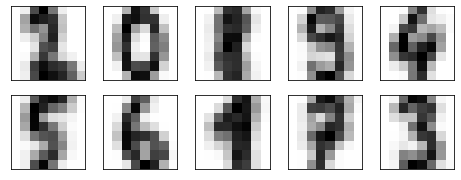

In [9]:
fig, ax = plt.subplots(2, 5, figsize=(8, 3))
for axi, center in zip(ax.flat, cls_kmns.cluster_centers_):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center.reshape(8, 8), cmap=plt.cm.binary)

Create a Pandas DataFrame `label_compare` with two columns: `label_cluster` that contains the labels assigned by the K-means clustering and `label_true` that contains the true (observed) label for each datapoint in `X`: 

In [11]:
#Start code here

label_compare = pd.DataFrame({'label_cluster': kmeans_result,'label_true': y})

#End code here

print(label_compare)

      label_cluster  label_true
0                 1           0
1                 2           1
2                 2           2
3                 9           3
4                 4           4
...             ...         ...
1792              3           9
1793              1           0
1794              2           8
1795              3           9
1796              3           8

[1797 rows x 2 columns]


Create a Pandas DataFrame `tmp` that contains all the rows in `label_compare` that were assigned to cluster center 0:

In [12]:
#Start code here

tmp = pd.DataFrame(label_compare[label_compare["label_cluster"] == 0])

#End code here

Print the first 20 rows in `tmp`:

In [13]:
#Start code here

print(tmp.head(20))

#End code here

     label_cluster  label_true
12               0           2
22               0           2
84               0           2
113              0           2
132              0           2
142              0           2
152              0           2
180              0           2
181              0           2
184              0           2
187              0           2
205              0           2
207              0           2
214              0           2
241              0           2
243              0           2
244              0           2
258              0           2
268              0           2
278              0           2


It should be clear that the labels assigned by K-means do not correspond to the true labels of the majority of the images in a cluster (i.e. the mode of the true labels in each cluster).

A Pandas Series has the function `mode()` to compute the mode of the values in a Series. Print the mode of the column `label_true` in `tmp`: 

In [18]:
#Start code here
mode = tmp.label_true.mode()
mode[0]
#End code here, mode geeft de meestvoorkomende waarde

2

Compute the mode for each cluster in `label_compare` and add these modes to the Python list `label_mapper`:

In [22]:
label_mapper = []

for i_label_cluster in range(0,10):
    #Start code here
    tmp2 = pd.DataFrame(label_compare[label_compare["label_cluster"] == i_label_cluster])

    label_mapper.append(tmp2.label_true.mode()[0])

    #End code here
    
for label_cluster in range(0,10):
    print("Mode for cluster labeled {} = {}".format(label_cluster,label_mapper[label_cluster]))

Mode for cluster labeled 0 = 2
Mode for cluster labeled 1 = 0
Mode for cluster labeled 2 = 1
Mode for cluster labeled 3 = 9
Mode for cluster labeled 4 = 4
Mode for cluster labeled 5 = 5
Mode for cluster labeled 6 = 6
Mode for cluster labeled 7 = 1
Mode for cluster labeled 8 = 7
Mode for cluster labeled 9 = 3


Use the `map()` function to add a column `label_mode` to `label_compare` that contains the mode for each cluster label in `label_cluster`:

In [23]:
#Start code here
b = dict(zip(range(0,10), label_mapper))
label_compare['label_mode']= label_compare.label_cluster.map(b)
#End code here

print(label_compare)

      label_cluster  label_true  label_mode
0                 1           0           0
1                 2           1           1
2                 2           2           1
3                 9           3           3
4                 4           4           4
...             ...         ...         ...
1792              3           9           9
1793              1           0           0
1794              2           8           1
1795              3           9           9
1796              3           8           9

[1797 rows x 3 columns]


Finally, we can compare the mode of the labels in each cluster with the true labels of the datapoints.

Print the accuracy of the K-means label modes (that can be seen as the class predictions computed by K-means):

In [26]:
from sklearn.metrics import accuracy_score

#Start code here
accuracy_score(label_compare.label_true,label_compare.label_mode)
#End code here

0.7885364496382861

The following code computes and plots a confusion matrix for the K-means predictions:

Text(91.68, 0.5, 'predicted label')

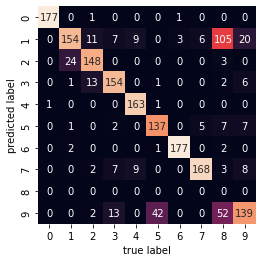

In [27]:
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(label_compare["label_true"],label_compare["label_mode"])
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=digits.target_names,
            yticklabels=digits.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')

For what digit do the K-means clusters make the most mistakes?

Apply K-means clustering again, but first normalize the feature vectors using `StandardScaler()` (write the normalized feature vectors to `X_norm`). What is the accuracy of the K-means predictions now?

In [32]:
from sklearn.preprocessing import StandardScaler

#Start code here
stdscale = StandardScaler()
X_norm = stdscale.fit_transform(X)

kmeans_result = cls_kmns.fit_predict(X_norm)

label_compare = pd.DataFrame({'label_cluster': kmeans_result,'label_true': y})
label_compare.head()

label_mapper = []
for label_cluster in range(0,10):
    clusternr = label_compare['label_cluster'] == label_cluster
    clusternr2 = label_compare[clusternr== True]
    mode = clusternr2.label_true.mode()
    label_mapper.append(mode[0])

label_compare['label_mode'] = label_compare['label_cluster'].map(lambda i: label_mapper[i])



#End code here

print(accuracy_score(label_compare["label_true"],label_compare["label_mode"]))


0.7117417918753478


Use the TNSE module in Scikit-learn to project the 64 dimensional feature vectors in `X` to a 2-dimensional space. Set the `perplexity` hyperparemter to 30.

In [33]:
from sklearn.manifold import TSNE

#Start code here

prj_tsne = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=30)
X_embedded =prj_tsne.fit_transform(X)

#End code here

print(X_embedded)

[[-6.1361607e+01  6.1411896e+00]
 [ 2.0784296e+01 -1.2451683e+00]
 [-4.2819232e-02 -1.9142296e+01]
 ...
 [-1.8145139e+00 -5.4029465e+00]
 [-1.8063429e+01  1.3207853e+01]
 [-4.4342265e+00 -6.6077261e+00]]


Create a Pandas DataFrame `tsne_result` that contains the two columns in `X_embedded` with column names `t-SNE_1` and `t-SNE_2`:

In [34]:
#Start code here

tsne_result = pd.DataFrame(X_embedded, columns=["t-SNE_1","t-SNE_2"])

#End code here

print(tsne_result)

        t-SNE_1    t-SNE_2
0    -61.361607   6.141190
1     20.784296  -1.245168
2     -0.042819 -19.142296
3    -26.530472  -2.303813
4     51.781055   3.575509
...         ...        ...
1792 -21.276323  13.767930
1793 -54.556080  10.228587
1794  -1.814514  -5.402946
1795 -18.063429  13.207853
1796  -4.434227  -6.607726

[1797 rows x 2 columns]


Add a column `label` to `tnse_result` that contains the true label `y`:

In [35]:
#Start code here
tsne_result["label"] = y
#End code here

print(tsne_result)

        t-SNE_1    t-SNE_2  label
0    -61.361607   6.141190      0
1     20.784296  -1.245168      1
2     -0.042819 -19.142296      2
3    -26.530472  -2.303813      3
4     51.781055   3.575509      4
...         ...        ...    ...
1792 -21.276323  13.767930      9
1793 -54.556080  10.228587      0
1794  -1.814514  -5.402946      8
1795 -18.063429  13.207853      9
1796  -4.434227  -6.607726      8

[1797 rows x 3 columns]


To plot the t-SNE result we first convert the `label` column to a string (to understand why we do this, just run the notebook while skipping the following line of code):

In [36]:
tsne_result["label"] = tsne_result["label"].astype(str) 

We can use the Python [Seaborn](https://seaborn.pydata.org/) library to plot the t-SNE result:

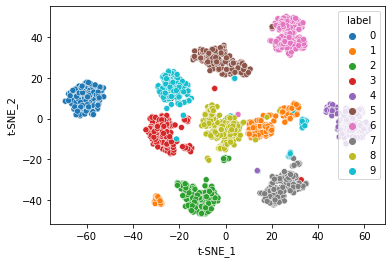

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(x="t-SNE_1",y="t-SNE_2",hue="label",data=tsne_result)

Apply K-means clustering to `X_embedded` and again create a Pandas DataFrame `label_compare` with columns `label_true` that contains the true labels and `label_mode` that contains the K-means predicted labels:

In [ ]:
#Start code here

kmeans_result = 

label_compare = 

label_mapper = []
for label_cluster in range(0,10):

label_compare["label_mode"] =
 
#End code here

print(label_compare)

What is the accuracy of the K-means label predictions now? 

In [ ]:
#Start code here

#End code here